In [1]:
import os
import glob
import numpy as np
import dask
import dask.array as da
from PIL import Image
from skimage.transform import resize
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_images = np.asarray(sorted(glob.glob("/home/skyolia/JupyterProjects/segmentation/DRIVE/data/training/images/*.tif")))
train_masks = np.asarray(sorted(glob.glob("/home/skyolia/JupyterProjects/segmentation/DRIVE/data/training/1st_manual/*.gif")))
test_images = np.asarray(sorted(glob.glob("/home/skyolia/JupyterProjects/segmentation/DRIVE/data/test/images/*.tif")))
test_masks = np.asarray(sorted(glob.glob("/home/skyolia/JupyterProjects/segmentation/DRIVE/data/test/1st_manual/*.gif")))

In [4]:
def load_save(path, new_shape):
    image = Image.open(path).convert('L')
    image = np.asarray(image)/255.0
    image = resize(image, new_shape, mode = 'constant', preserve_range = True)
    return image

def data_processing(data_paths, new_shape):
    x = []
    for i in data_paths:
        image = dask.delayed(load_save)(i, new_shape)
        x.append(image)
    return np.asarray(dask.compute(*x, scheduler='processes')).astype(np.float32)

#train_x = data_processing(train_images, (512, 512))
#train_y = data_processing(train_masks, (512, 512))
#test_x = data_processing(test_images, (512, 512))
#test_y = data_processing(test_masks, (512, 512))
test_xx = data_processing(test_images, (64, 64))
test_yy = data_processing(test_masks, (64, 64))
#train_x.shape, train_y.shape, test_x.shape, test_y.shape

/home/skyolia/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/skyolia/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/skyolia/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/skyolia/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/skimage/transfor

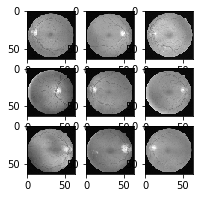

In [8]:
fig=plt.figure(figsize=(3, 3))
columns = 3
rows = 3
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_xx[i-1], cmap=plt.get_cmap('gray'))
plt.show()

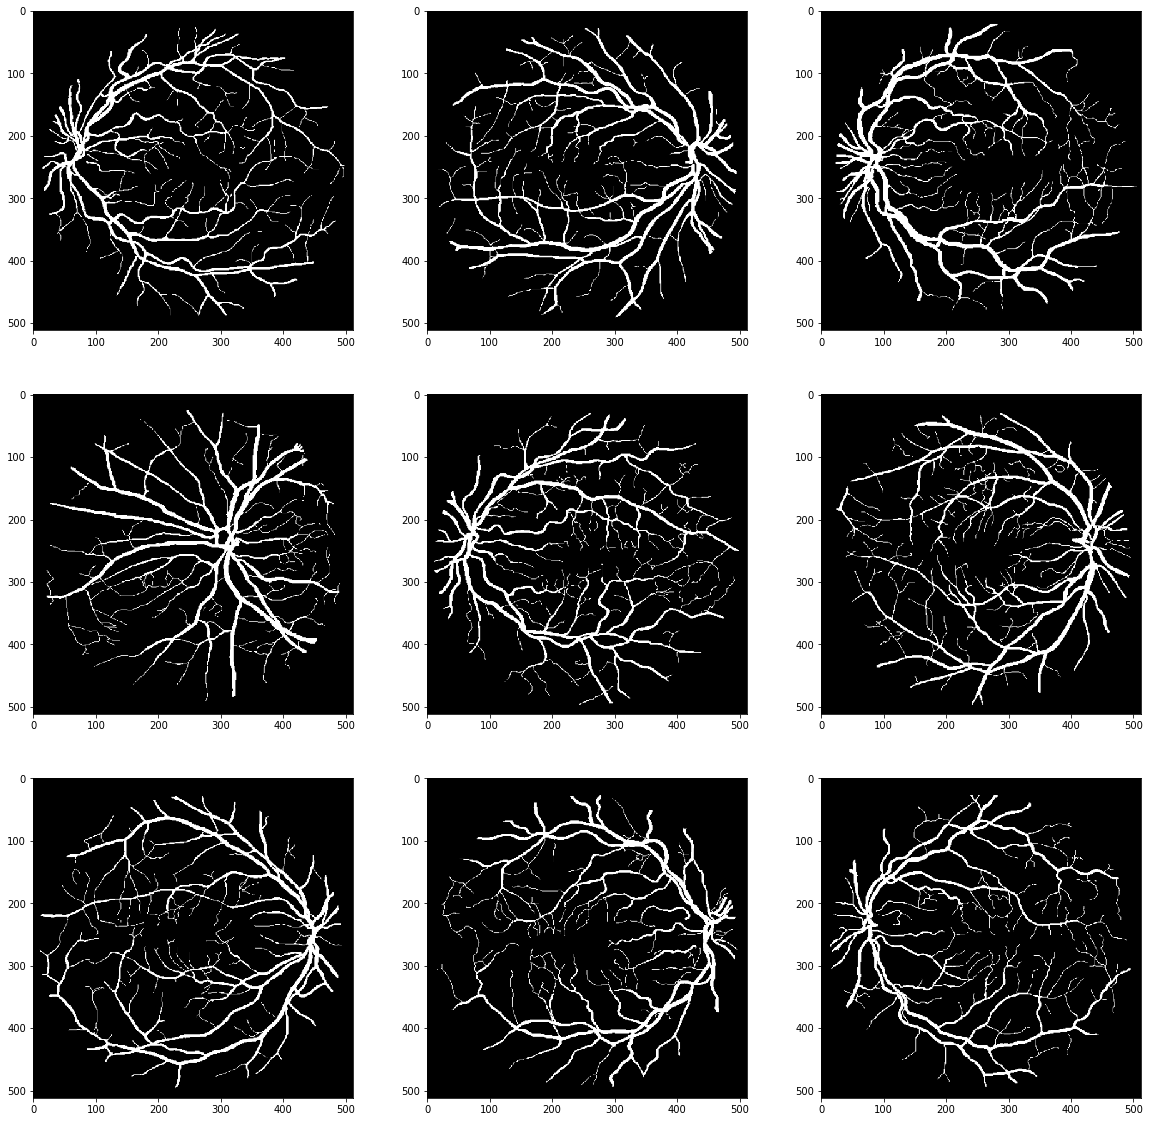

In [8]:
fig=plt.figure(figsize=(20, 20))
columns = 3
rows = 3
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(test_y[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
train_x = da.from_array(train_x[:,:,:,np.newaxis], chunks=(20, 512, 512, 1))
train_y = da.from_array(train_y[:,:,:,np.newaxis], chunks=(20, 512, 512, 1))
test_x = da.from_array(test_x[:,:,:,np.newaxis], chunks=(20, 512, 512, 1))
test_y = da.from_array(test_y[:,:,:,np.newaxis], chunks=(20, 512, 512, 1))
da.to_npy_stack('/home/skyolia/JupyterProjects/segmentation/DRIVE/data/train_x', train_x, axis=0)
da.to_npy_stack('/home/skyolia/JupyterProjects/segmentation/DRIVE/data/train_y', train_y, axis=0)
da.to_npy_stack('/home/skyolia/JupyterProjects/segmentation/DRIVE/data/test_x', test_x, axis=0)
da.to_npy_stack('/home/skyolia/JupyterProjects/segmentation/DRIVE/data/test_y', test_y, axis=0)
train_x, train_y, test_x, test_y

(dask.array<array, shape=(20, 512, 512, 1), dtype=float32, chunksize=(20, 512, 512, 1)>,
 dask.array<array, shape=(20, 512, 512, 1), dtype=float32, chunksize=(20, 512, 512, 1)>,
 dask.array<array, shape=(20, 512, 512, 1), dtype=float32, chunksize=(20, 512, 512, 1)>,
 dask.array<array, shape=(20, 512, 512, 1), dtype=float32, chunksize=(20, 512, 512, 1)>)